Import module

In [74]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

Load data

In [75]:
df = yf.download("MSFT", start="2000-01-01", end="2023-12-31")   
# Create sequences
from copy import deepcopy as dc

def prepare_dataframe(df, n_steps):
    df = dc(df)
        
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
    df.drop(columns=columns, inplace=True)
    X, y = df.drop('Close', axis=1), df['Close']
    return X, y
n_steps = 10
X,y = prepare_dataframe(df, n_steps)

[*********************100%%**********************]  1 of 1 completed


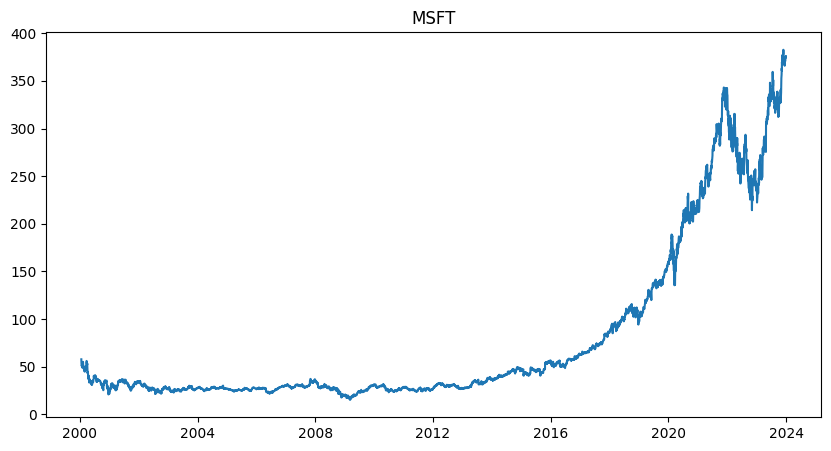

In [76]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y)
plt.title('MSFT')
plt.show()

Time Series Splits

In [77]:
N_SPLITS =20
tscv = TimeSeriesSplit(n_splits=N_SPLITS)

In [78]:
model = LinearRegression()

RMSE: 0.7758888539971922, R2: 0.9328399268900847


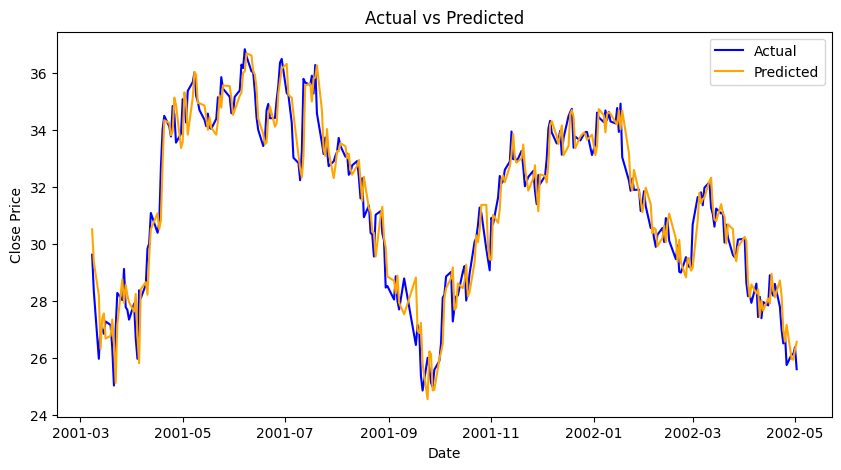

RMSE: 0.6646857295214744, R2: 0.8390728773147773
RMSE: 0.3895708499791552, R2: 0.8968336734503708


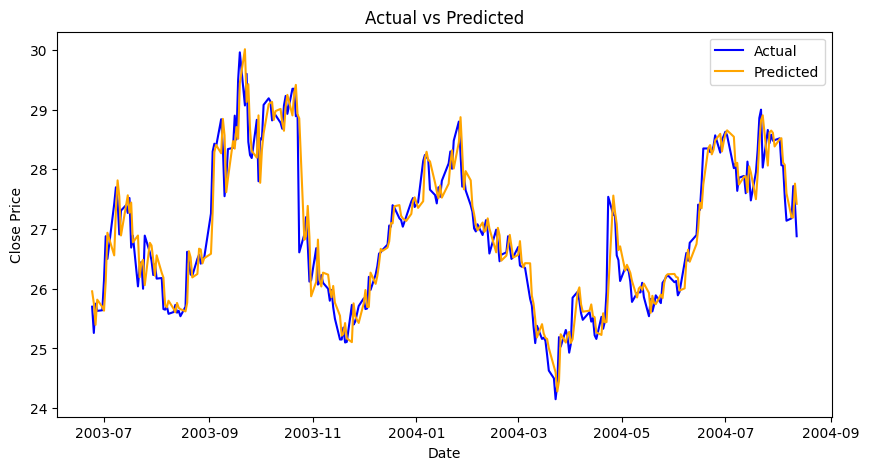

RMSE: 0.28327355330245435, R2: 0.944515944932079
RMSE: 0.32914583124642677, R2: 0.9716205981798802


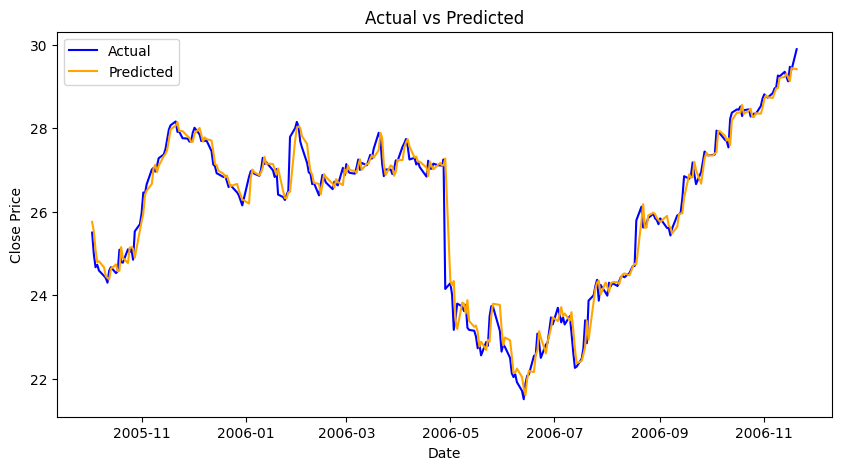

RMSE: 0.4508048935152626, R2: 0.961425736059818
RMSE: 0.7473749293329002, R2: 0.9714352308452409


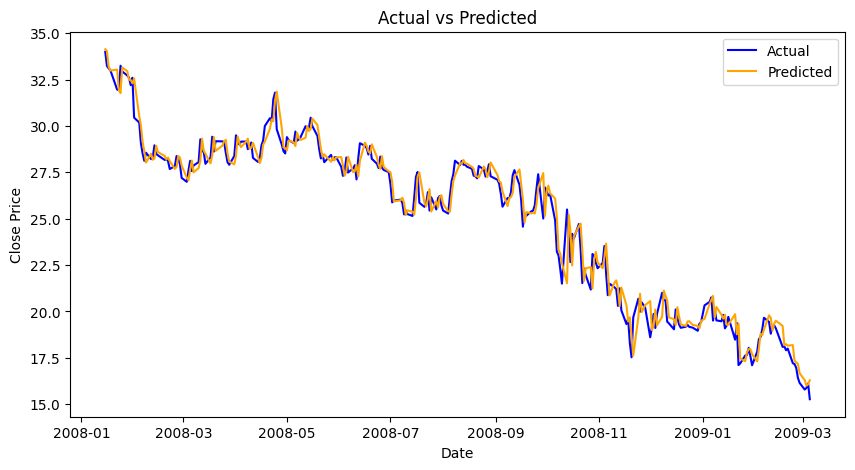

RMSE: 0.40927384936834615, R2: 0.9906760148353576
RMSE: 0.35520727622207704, R2: 0.9493979495100149


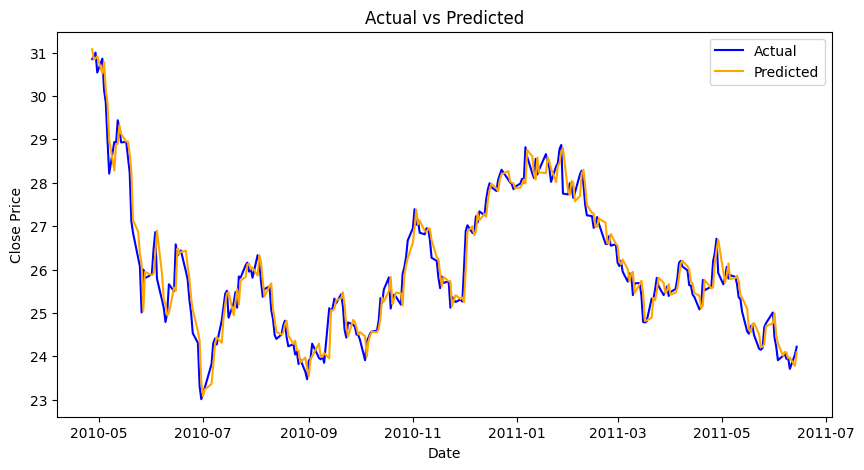

RMSE: 0.427269072885157, R2: 0.9706733986129689
RMSE: 0.4877201495934684, R2: 0.9678390860230228


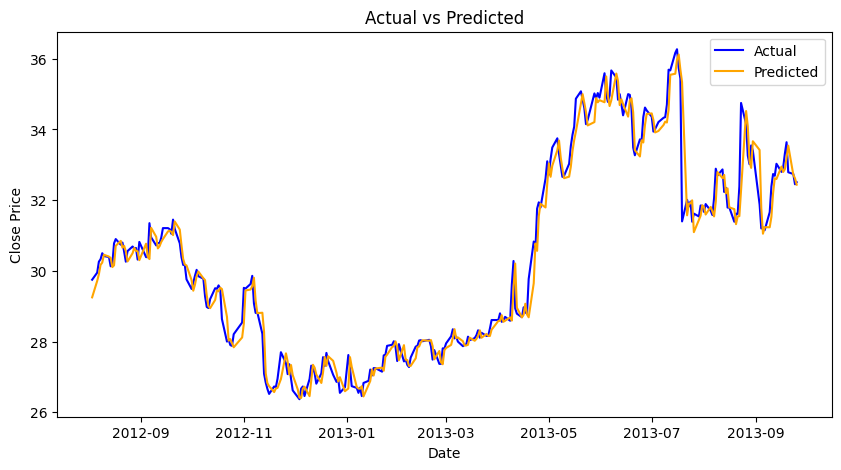

RMSE: 0.5372272616804296, R2: 0.981677443804761
RMSE: 0.8114734081845388, R2: 0.9616151685213032


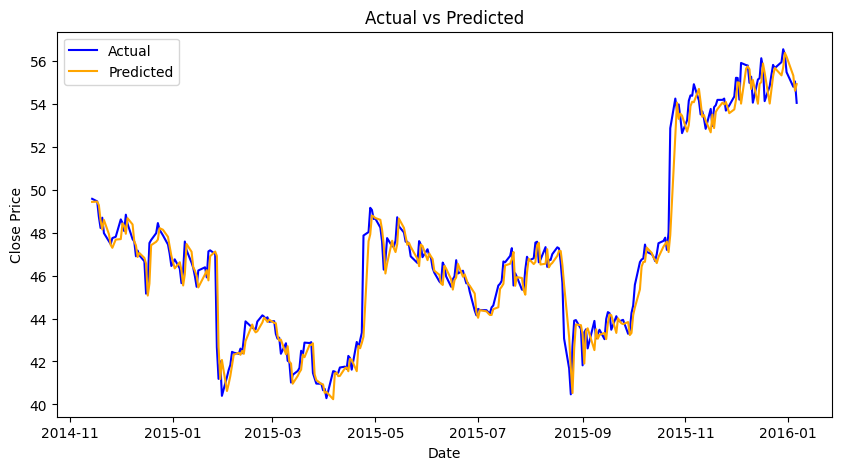

RMSE: 0.748265572288245, R2: 0.9733430296151704
RMSE: 1.119737627553859, R2: 0.9870230500096758


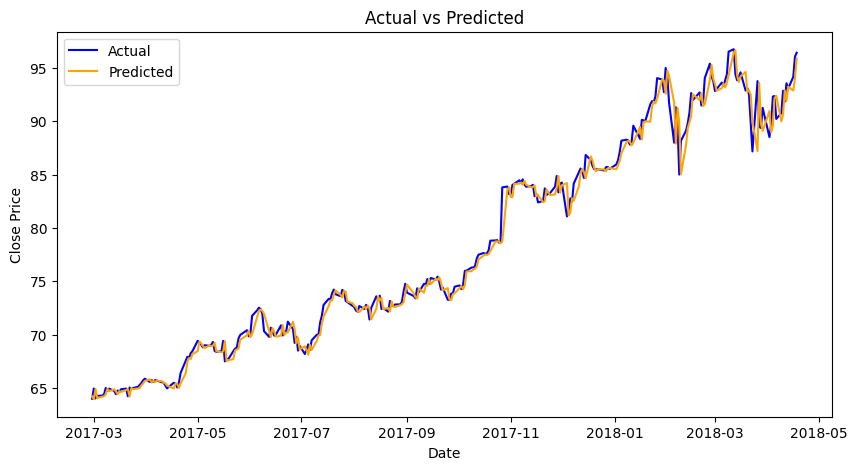

RMSE: 1.6955893726067524, R2: 0.9648081863505288
RMSE: 3.745664378050932, R2: 0.9733744611971894


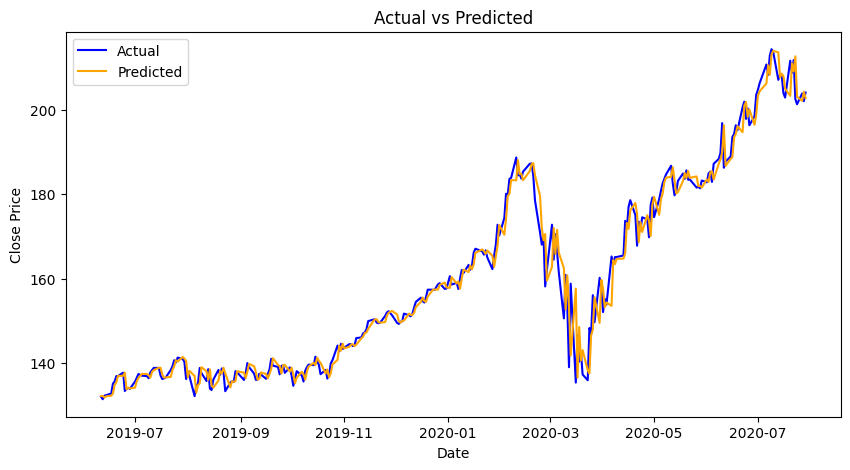

RMSE: 3.6781372601565674, R2: 0.98457733668163
RMSE: 5.812770283770086, R2: 0.965869154840739


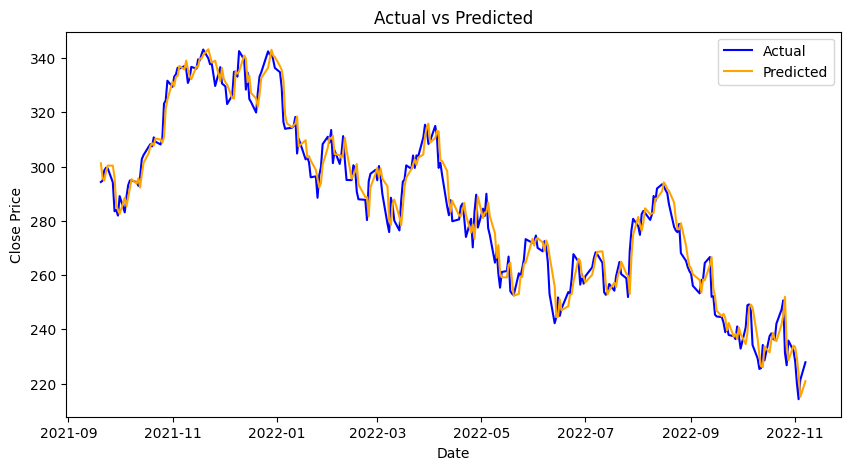

RMSE: 4.8195675142459615, R2: 0.9884541616278731


In [79]:
for i,(train_index, test_index) in enumerate(tscv.split(X)):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model
    
    model.fit(x_train, y_train)
    # Make predictions and evaluate the model
    predictions = model.predict(x_test)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'RMSE: {rmse}, R2: {r2}')
    # Plot the actual vs predicted values
    if i % 2 == 0:
        plt.figure(figsize=(10, 5))
        plt.plot(y_test.index, y_test, label='Actual',color = 'blue')
        plt.plot(y_test.index, predictions, label='Predicted', color = 'orange')
        plt.title('Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

Test with non-training data

In [80]:
test_df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [81]:
X_test, y_test = prepare_dataframe(test_df, n_steps)

In [82]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')

MSE: 1.2684805845545757, R2: 0.9995136282838457


In [83]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

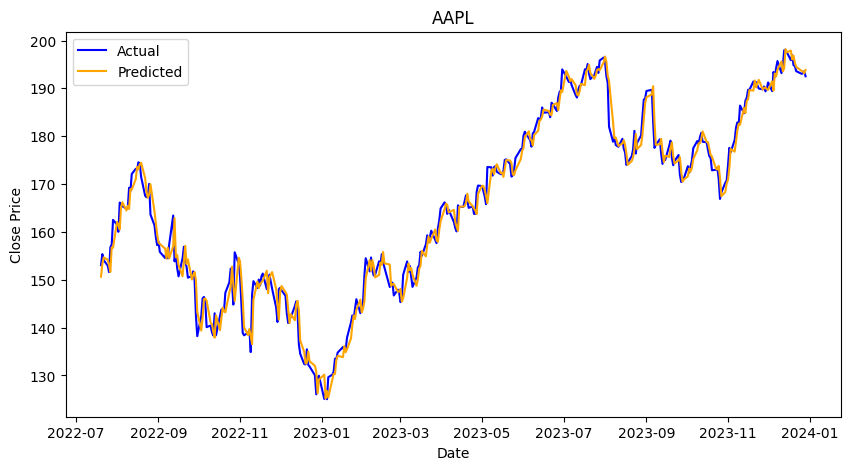

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(results['Actual'][-365:], label='Actual',color = 'blue')
plt.plot(results['Predicted'][-365:], label='Predicted', color = 'orange')
plt.title('AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Random Split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [86]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [87]:
pred = model.predict(x_test)
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 2.003616619796201, R2: 0.9994801236916679


In [88]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

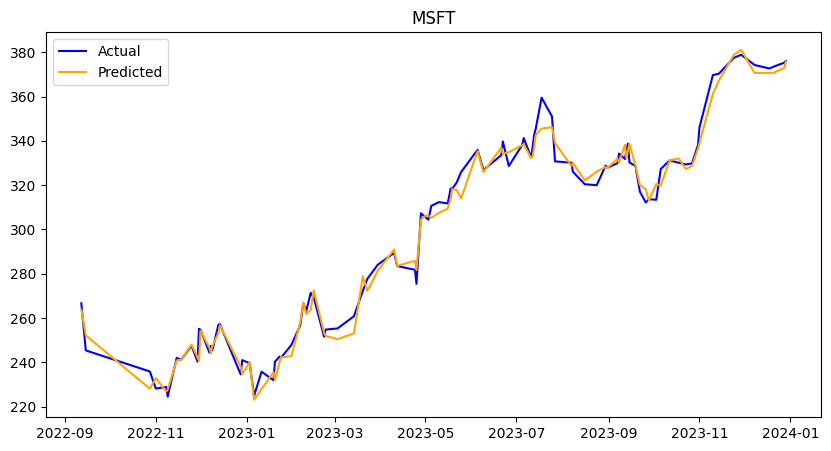

In [89]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-100:],label = 'Predicted',color = 'orange')
plt.title('MSFT')
plt.legend()
plt.show()

Test with non-training data

In [90]:
test_df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [91]:
X_test, y_test = prepare_dataframe(test_df, n_steps)

In [92]:
pred = model.predict(X_test)

In [93]:
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 1.1243191714327554, R2: 0.9995145623838043


In [94]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

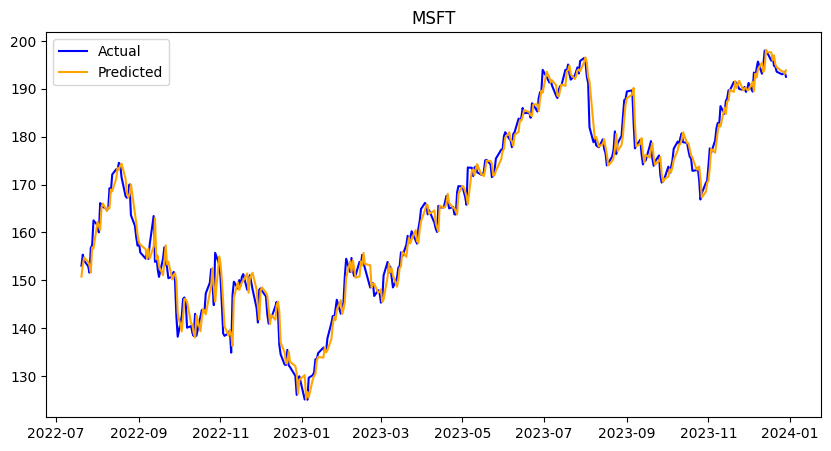

In [95]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-365:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-365:],label = 'Predicted',color = 'orange')
plt.title('MSFT')
plt.legend()
plt.show()

GridSearch

In [96]:
data = yf.download("MSFT", start="2000-01-01", end="2023-12-31")
X,y = prepare_dataframe(data, n_steps)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

[*********************100%%**********************]  1 of 1 completed


In [97]:
ridge_params = {'alpha': [10**i for i in range(-10,10)]}
lasso_params = {'alpha': [10**1 for i in range(-10,10)]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=3)

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print(f'Best Ridge Params: {ridge_grid.best_params_}')
print(f'Best Lasso Params: {lasso_grid.best_params_}')

Best Ridge Params: {'alpha': 100}
Best Lasso Params: {'alpha': 10}


RIDGE

In [98]:
model = Ridge(alpha = 1e-10)

In [99]:
model.fit(X_train,y_train)

Ridge(alpha=1e-10)

In [100]:
pred = model.predict(X_test)

In [101]:
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse},R2: {r2}')

RMSE: 1.90401178746164,R2: 0.9995279329562915


In [102]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

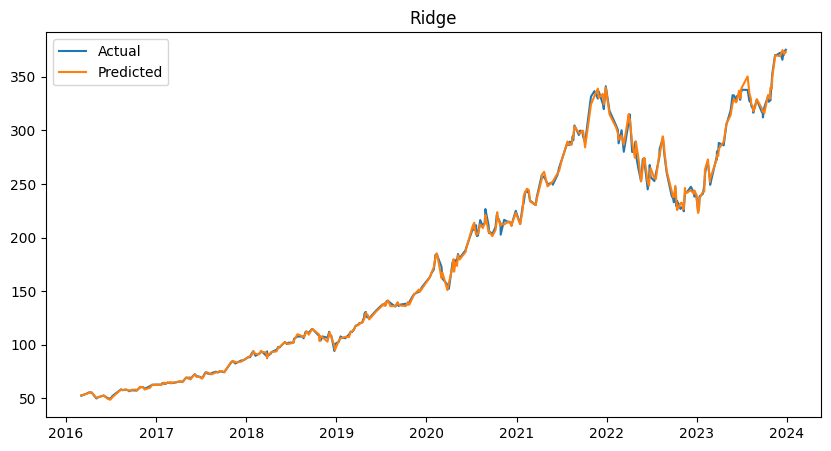

In [103]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-365:],label ='Actual')
plt.plot(results['Predicted'][-365:],label = 'Predicted')
plt.title('Ridge')
plt.legend()
plt.show()

LASSO

In [104]:
model = Lasso(alpha=10)

In [105]:
model.fit(X_train,y_train)

Lasso(alpha=10)

In [106]:
pred = model.predict(X_test)

In [107]:
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse},R2: {r2}')

RMSE: 1.9300101470139632,R2: 0.9995136727371874


In [108]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

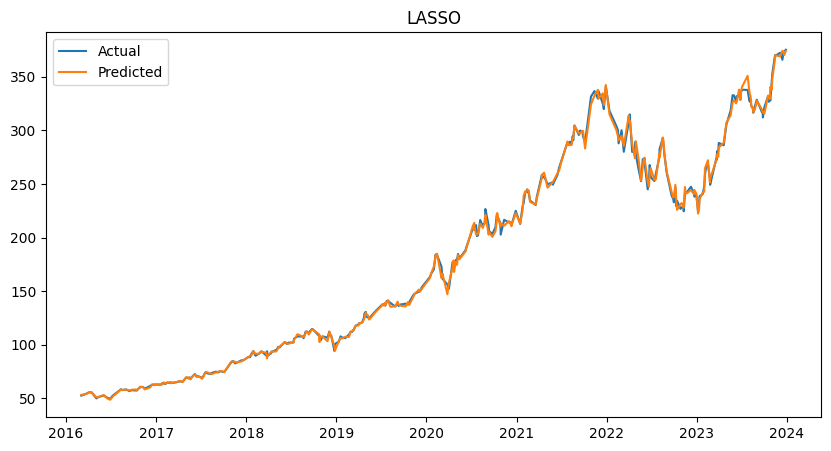

In [109]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-365:],label ='Actual')
plt.plot(results['Predicted'][-365:],label = 'Predicted')
plt.title('LASSO')
plt.legend()
plt.show()